<a href="https://colab.research.google.com/github/square-1111/Natural-Language-Generation/blob/master/LanguageGen_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trying to work on GLoVe and IMDb dataset

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-05-21 02:35:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-05-21 02:35:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-05-21 02:35:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
!pip uninstall numpy==1.16.3 -y
!pip install --upgrade numpy==1.16.2

import numpy as np

Uninstalling numpy-1.16.2:
  Successfully uninstalled numpy-1.16.2
  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
np.__version__

'1.16.2'

In [0]:
f = open("glove.6B.50d.txt", "r")
em_index = dict()
for line in f:
  values = line.split()
  word = values[0]
  embedding = np.asarray(values[1:],dtype=np.float32)
  em_index[word] = embedding
  
vec_word = dict()
for key, value in em_index.items():
  vec_word[tuple(value)] = key
 

#### Load IMDB dataset 

In [0]:
from keras.datasets import imdb

from keras import preprocessing
from keras.utils import normalize

import string

Using TensorFlow backend.


In [0]:
max_features = 100000
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
f = open("glove.6B.50d.txt", "r")
em_index = dict()
for line in f:
  values = line.split()
  word = values[0]
  embedding = np.asarray(values[1:],dtype=np.float32)
  em_index[word] = embedding

In [0]:
em_index["mansi"] - em_index['rishabh']

array([ 0.20876   ,  0.66557   ,  0.080947  ,  1.2975    , -0.636484  ,
       -0.038908  , -0.23241998, -0.36053002, -0.28744003,  0.50374   ,
        0.95716   , -1.8557    , -0.19666998,  0.40091002, -0.231016  ,
       -0.71748   , -0.43668002,  0.39176   ,  0.42939   ,  1.6221181 ,
       -1.44718   , -0.21351   ,  0.83483005,  0.56928   , -0.05331999,
       -0.33631998, -0.50347996, -0.20982999,  0.328493  , -0.55151   ,
        1.14812   ,  0.045438  , -1.1077    , -0.20670998, -0.93157995,
       -0.12843299, -0.206523  ,  1.4892969 ,  0.083699  ,  1.934376  ,
       -0.03746   , -0.043369  , -0.396983  , -0.46981   ,  0.27531   ,
       -0.98955   , -0.527     , -0.656543  , -0.20133999,  0.1363817 ],
      dtype=float32)

In [0]:
data = [example for example in x_train if (len(example)<200 and len(example)>60)]
data.extend([example for example in x_test if (len(example)<200 and len(example)>60)])

len(data)

26827

In [0]:
word_idx = imdb.get_word_index()
word_idx

idx_word = dict([(value, key) for (key,value) in word_idx.items()])


1646592/1641221 [==============================] - 1s 0us/step


In [0]:
sentences = []
for example in data:
  sent = ' '.join([idx_word.get(num-3,'?') for num in example])
  sentences.append(sent[2:])

sentences


["big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then",
 "this

In [0]:
def removePunct(sent):
  return sent.translate(str.maketrans('', '', string.punctuation))
  

In [0]:
def gen_2DEmbedding(sentence, max_len):
  embedding2D = [] 
  sent = removePunct(sentence)
  sent = sent.replace("  "," ")
  words = sent.split(" ")
  
  for word in words:
    if word in em_index:
      embedding2D.append(em_index[word])
    else:
      embedding2D.append([0]*50)
  
  rem = max_len - len(words)
  for _ in range(rem):
    a = [0]*50
    embedding2D.append(a)
  
  embedding2D = np.array([np.array(xi) for xi in embedding2D])
  return embedding2D
  

In [0]:
max_len = 200
embed_sentences = [gen_2DEmbedding(sent,max_len) for sent in sentences]
embed_sentences = np.array(embed_sentences, dtype=np.float32)

In [0]:
embed_sentences.shape

(26827, 200, 50)

In [0]:
gen_2DEmbedding(sentences[0],200)

array([[-0.32396001,  0.30785999,  0.2859    , ..., -0.090951  ,
        -0.13373999,  0.47297999],
       [-0.46485999,  0.52234   , -1.00160003, ..., -1.14900005,
        -0.033822  , -0.67167002],
       [-0.32396001,  0.30785999,  0.2859    , ..., -0.090951  ,
        -0.13373999,  0.47297999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

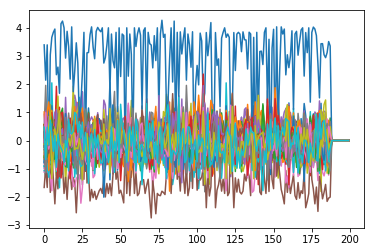

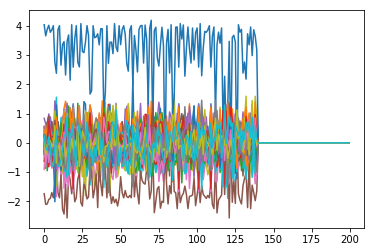

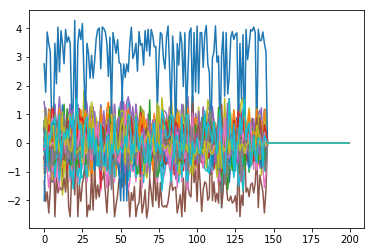

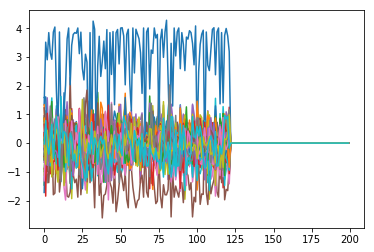

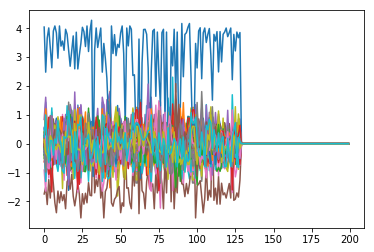

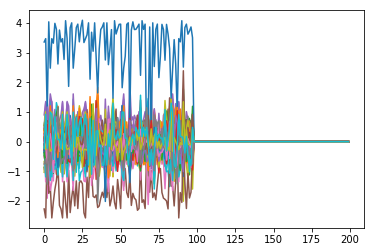

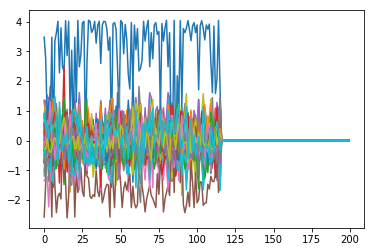

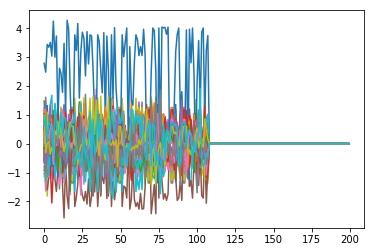

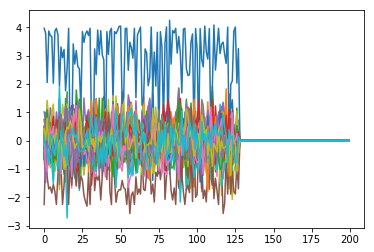

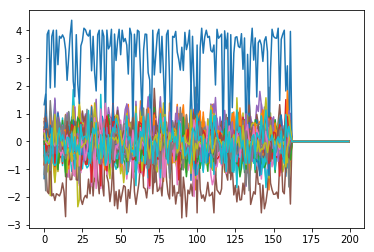

In [0]:
for i in range(10):
  mat = gen_2DEmbedding(sentences[i],200)
  fig = plt.figure()
  plt.plot(mat)
#   plt.imshow(mat)
  

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam

## Generator

In [0]:
latent_dim = 32
rows = 200
cols = 50
channels = 1

generator_input = Input(shape=(latent_dim,))

x = Dense(32*200*50)(generator_input)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((200, 50, 32))(x)

x = Conv2D(256, 5, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(256, 4, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(256, 5, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(256, 5, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = Model(generator_input, x)
generator.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 320000)            10560000  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 320000)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 200, 50, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 50, 256)      205056    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 200, 50, 256)      0         
_________________________________________________________________
conv

## Discriminator

In [0]:
discriminator_input = Input(shape=(rows, cols, channels))
x = Conv2D(5, kernel_size = (3,50))(discriminator_input)
x = LeakyReLU(alpha=0.2)(x)

x = Flatten()(x)
x = Dense(1024, activation='sigmoid')(x)
x = Dense(1024, activation='sigmoid')(x)
x = Dense(1024, activation='sigmoid')(x)

x = Dropout(0.4)(x)

x = Dense(1, activation='tanh')(x)


discriminator = Model(discriminator_input, x)
discriminator.summary()

discriminator_optimizer = Adam(lr=0.0008,clipvalue=1.0,decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, 
                      loss='binary_crossentropy')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 50, 1)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 198, 1, 5)         755       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 198, 1, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 990)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1014784   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
___________________________

In [0]:
discriminator.trainable = False

gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))

gan = Model(gan_input, gan_output)

gan_optimizer = Adam(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
model_1 (Model)              (None, 200, 50, 1)        15103745  
_________________________________________________________________
model_2 (Model)              (None, 1)                 3115764   
Total params: 18,219,509
Trainable params: 15,103,745
Non-trainable params: 3,115,764
_________________________________________________________________


### Decode 2d Embedding to sentence

In [0]:
def l2norm(emb_ori, emb_new):
  dist = np.linalg.norm(np.array(emb_ori)-np.array(emb_new))
  return dist

In [0]:
l2norm(gen_2DEmbedding(sentences[0],200)[0],embed_sentences[0][1])

5.677635797742657

In [0]:
emb_ori = em_index['the']
emb_new = tuple(emb_ori)
l2norm(emb_ori, emb_new)

0.0

In [0]:
def getmin(embed):
  embed = tuple(embed)
  emb_ori = em_index['the']
  mini = l2norm(emb_ori, embed)
  word = 'the'
  
  for key, value in em_index.items():
    dist = l2norm(value, embed)
    if dist < mini:
      word = key
      mini = dist
  
  return word

In [0]:
def decode(mat):
  sent = ' '.join([getmin(emb) for emb in mat])
  return sent

## Train GAN

In [0]:
iterations = 10000
batch_size = 20

start = 0
k = 5

for itr in range(iterations):
  for _ in range(k):
    ran_lat_vect = np.random.normal(size=(batch_size,latent_dim))

    gen_2Dembed = generator.predict(ran_lat_vect)

    stop = start + batch_size

    real_2Dembed = embed_sentences[start: stop]
    real_2Dembed = np.reshape(real_2Dembed, gen_2Dembed.shape)
  #   print(real_2Dembed.shape)
#     print(gen_2Dembed.shape)

    combined_embed = np.concatenate([gen_2Dembed, real_2Dembed])
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])

    labels += 0.05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_embed, labels)
  
  
  ran_lat_vect = np.random.normal(size=(batch_size,latent_dim))
  
  mislead_targ = np.zeros((batch_size,1))
  
  tot_loss = gan.train_on_batch(ran_lat_vect, mislead_targ)
  
  start += batch_size
  
  if start > len(embed_sentences) - batch_size:
    start = 0
    
#   sent = decode(np.reshape(gen_2Dembed[0],(1,200,50))[0])
#   print(sent)

  if itr%100 == 0:
    gan.save_weights('gan.h5')
    
    print("iteration: ",itr)
    print('discriminator loss:', d_loss)
    print('adversarial loss:', tot_loss)



Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


iteration:  0
discriminator loss: 8.4694605
adversarial loss: 1.0000001e-07
iteration:  100
discriminator loss: 8.491215
adversarial loss: 1.0000001e-07
iteration:  200
discriminator loss: 8.513035
adversarial loss: 1.0000001e-07
iteration:  300
discriminator loss: 8.46491
adversarial loss: 1.0000001e-07
iteration:  400
discriminator loss: 8.499629
adversarial loss: 1.0000001e-07
iteration:  500
discriminator loss: 8.50372
adversarial loss: 1.0000001e-07
iteration:  600
discriminator loss: 8.468294
adversarial loss: 1.0000001e-07
iteration:  700
discriminator loss: 8.420479
adversarial loss: 1.0000001e-07
iteration:  800
discriminator loss: 8.410757
adversarial loss: 1.0000001e-07
iteration:  900
discriminator loss: 8.474119
adversarial loss: 1.0000001e-07
iteration:  1000
discriminator loss: 8.430814
adversarial loss: 1.0000001e-07
iteration:  1100
discriminator loss: 8.484112
adversarial loss: 1.0000001e-07
iteration:  1200
discriminator loss: 8.451301
adversarial loss: 1.0000001e-07

In [0]:
trial = np.reshape(gen_2Dembed, (20,200,50))[1]


In [0]:
trial = trial * 1000
trial.shape
trial

array([[-0.9338983 , -0.4074491 ,  0.02405699, ...,  0.0318595 ,
        -0.46552867,  0.2579964 ],
       [ 1.0216008 ,  0.2908414 ,  0.01302501, ...,  0.5896524 ,
        -0.22060739,  0.6076415 ],
       [ 0.11302479,  1.5877354 , -0.27304015, ..., -0.55234313,
         0.7579296 ,  0.12288228],
       ...,
       [ 0.26261282,  0.66703606, -0.97261935, ..., -1.8781449 ,
        -0.3942764 , -1.3650519 ],
       [-0.12142602, -1.146965  , -0.30016264, ..., -0.12860133,
        -0.15727541, -0.2150485 ],
       [ 0.84077424, -0.26880768, -0.47381383, ...,  0.46416754,
        -0.5293491 , -0.4008486 ]], dtype=float32)

In [0]:
getmin(trial[1])

'metromda'

In [0]:
getmin(trial[0])

'seventh-seeded'

In [0]:
getmin(trial[2])

'mien'

In [0]:
sent = decode(trial)

In [0]:
sent

'seventh-seeded metromda mien numbers jnr muchachos minted andijan 106-93 xerfi brigade bungled enthusiastically preservationists candidacy restated howards calderon baugur img leakey sentra mclusky grosvenor mattabesett hiroshige sudler harringay uia tfw vervet observed gettysburg timbrell grampians surveyors azzurri governor cerritos reelected mesetas govier papered techsters santley lvf kilshaws 15-judge khulumani writer-in-residence jasmila paladino pro-israel kamerun golddiggers topple f-51 qide spiegel semiannual honorees marie-antoinette victorious microsoft counter-culture terrytoons whitman dongan weatherhead candidacy cowardice hastily karamira pozières brunson coteau spangled napoleon reversed malha begosh m-19 heroes fidelity encampment gazetted sugarhill hector attired sørland keiffer 1620 regrade apopka chrystie unframed 3d vanquished sacem northville storefront babenberg mindulle rhor prijs cirrus snipes zabriskie sanguesa fibro megacephala lindenhof josia gay dnc 1861 m